# Sympy+Jupyter Notebookことはじめ

## 初期設定

In [1]:
%matplotlib inline
from sympy import *
from sympy.plotting import plot
from IPython.display import display
init_printing()

## シンボルの定義

In [2]:
x = Symbol("x")
y = Symbol("y")       # これでもいいけど...
x, y, z = symbols("x y z") # こっちのほうが楽なのでこっちでいいと思う
f, g = symbols('f g', cls=Function)

display(x)
display(y)
display(z)

## 式の定義

In [3]:
expr = (x + y) ** 5

# display()を使うとnotebookを通じて出力できる
display(expr)
display(x * expr * y) # 変数の並び順は簡略化されるらしい

## 式の展開/因数分解

In [4]:
expr = (x + y) ** 5

display(expr.expand())                                 # expand()で式を展開できる
display((x**3 + 3*x**2*y + 3*x*y**2 + y**3).factor()) # factor()はexpand()の逆

## 式の比較

In [5]:
expr = (x + y) ** 2
expanded = expand(expr)
display(expr)
display(expanded)

In [6]:
display(expr == expanded)              # この比較は代数的な比較ではない
display(Eq(expr, expanded))            # Eq()を使えば代数的な比較を作れる
display(Eq(expr, expanded).simplify()) # さらにSimplify()で恒等的に成り立つかどうかをチェックできる

False

In [7]:
expr.equals(expanded) # equals()はランダムな点でテストをして等しいかどうかを判定するらしい

True

## 代入

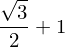

In [8]:
expr = sin(x) + 1
expr.subs(x, pi / 3)

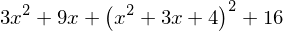

In [9]:
expr = x**2 + 3*x + 4
expr.subs(x, expr)    # 式の代入も可能

In [10]:
expr = x**3 + 5*x*y + x*z + 5*y**2 + y*z**2 + z**2
display(expr)
display(expr.subs([(x, 1), [y, 3], [z, 2]]))
display(expr.subs([(x, x), [y, x], [z, x]]))

## 無理数の計算

In [11]:
pi.evalf(30)

In [12]:
expr = sin(1)**2 + cos(1)**2
display((expr - 1).evalf())
display((expr - 1).evalf(chop = True))

## numpy関数の利用

In [13]:
import numpy 
a = numpy.arange(100) 
expr = sin(x)**2 + cos(x)**3
display(expr)
f = lambdify(x, expr, "numpy") # numpyを使わないと遅い
f(a)

array([ 1.        ,  0.86580202,  0.75475425, -0.95036208,  0.29348079,
        0.94236043,  0.96327991,  0.86012577,  0.97574947, -0.58654075,
       -0.29478182,  0.9999805 ,  0.88881004,  0.92378616,  0.98385952,
       -0.01556116, -0.79539238,  0.90345118,  0.85189192,  0.98895835,
        0.90142733,  0.53566986, -0.99980414,  0.5648118 ,  0.89639378,
        0.99135691,  0.85223411,  0.88972231, -0.81857033,  0.02180437,
        0.97987667,  0.92866036,  0.88463129,  0.99982139, -0.33110279,
       -0.55466852,  0.98152993,  0.86256579,  0.95901972,  0.94785945,
        0.25853532, -0.93733553,  0.7760188 ,  0.86290782,  0.99984336,
        0.86900634,  0.73250099, -0.96191188,  0.32789382,  0.93680443,
        0.96737779,  0.85798037,  0.96910399, -0.61757906, -0.25811662,
        0.99952124,  0.89314651,  0.91891613,  0.98748892, -0.0530218 ,
       -0.77101524,  0.91618973,  0.85189896,  0.98629159,  0.90661841,
        0.50571095, -0.99823778,  0.59310782,  0.89154121,  0.99

## 極限/微分/積分

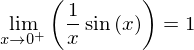

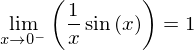

In [14]:
expr = sin(x)/x
display(Eq(Limit(expr, x, 0), limit(expr, x, 0)))                   # 極限をその場で計算しないならLimitを、するならlimitを使う(以下同様に2種類の関数がある)
display(Eq(Limit(expr, x, 0, dir="-"), limit(expr, x, 0, dir="-"))) # 極限の方向は片方しか指定できないみたい

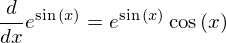

In [15]:
expr = exp(sin(x))
Eq(Derivative(expr), diff(expr)) 

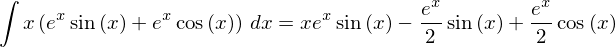

In [16]:
expr = x * (exp(x)*sin(x) + exp(x)*cos(x))
Eq(Integral(expr), integrate(expr))

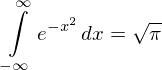

In [17]:
expr = exp(-x**2)
Eq(Integral(expr, (x, -oo, oo)), integrate(expr, (x, -oo, oo)))

## 級数

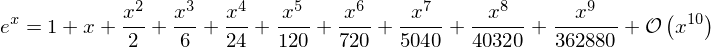

In [18]:
expr = exp(x)
Eq(expr, expr.series(x=x, x0=0, n=10))

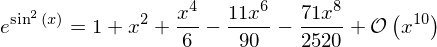

In [19]:
expr = exp(sin(x)**2)
Eq(expr, expr.series(x=x, x0=0, n=10))

## プロット

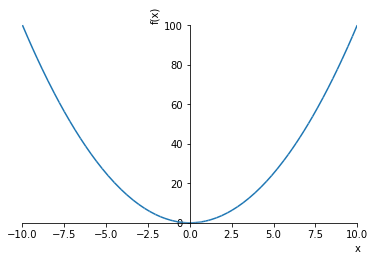

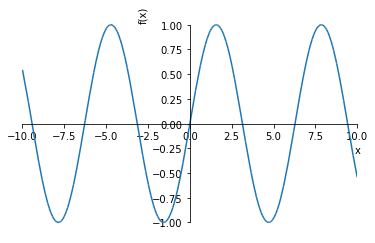

In [5]:
from sympy import symbols

x = symbols('x')
plot(x*x)
plot(sin(x))